# Glowing Circle Background

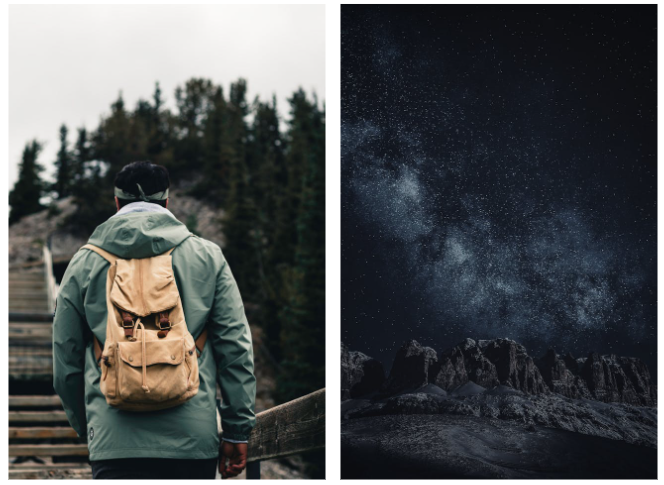

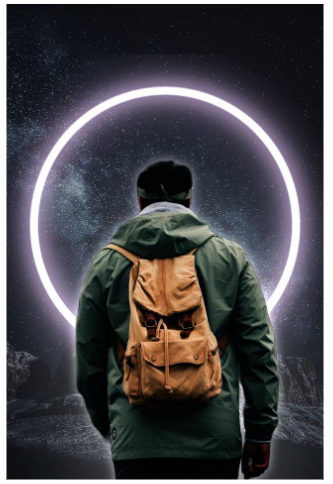

## 1. Remove Background

### Install 'transparent-background' library





In [ ]:
!pip install --extra-index-url https://download.pytorch.org/whl/cu118 git+https://github.com/plemeri/transparent-background.git

In [ ]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from transparent_background import Remover

### Load image

In [ ]:
img = Image.open("traveler.jpg")

In [ ]:
# display image
plt.imshow(img)
plt.show()

In [ ]:
# remove background
remover = Remover()

img_noBG = remover.process(img)

mask = remover.process(img, type='map')

In [ ]:
plt.imshow(img_noBG)
plt.show()

In [ ]:
plt.imshow(mask)
plt.show()

## 2. Darken foreground

In [ ]:
def multiply_blend(img1, img2):

  # convert image format from 'RGB' to 'RGBA'
  img1 = img1.convert('RGBA')

  # convert PIL image to numpy arrays and normalize
  img_array_1 = np.array(img1, dtype=float) / 255
  img_array_2 = np.array(img2, dtype=float) / 255

  # Perform the multiply blend
  multiply_blend_array = img_array_1 * img_array_2

  # Convert back to 8-bit values
  multiply_blend_array = (multiply_blend_array * 255).astype(np.uint8)

  # Create array to PIL image
  multiply_blend_img = Image.fromarray(multiply_blend_array)

  return multiply_blend_img

In [ ]:
# apply Multiply Blend on the input image and the image without background
img_noBG_dark = multiply_blend(img, img_noBG)

In [ ]:
plt.imshow(img_noBG_dark)
plt.show()

## 3. Add glowing ring to background

In [ ]:
# load images
background = Image.open("night.jpg")

ring = Image.open("glowing-ring.jpg")

In [ ]:
plt.imshow(background)
plt.show()

In [ ]:
plt.imshow(ring)
plt.show()

In [ ]:
def screen_blend(img1, img2):
  img_array_1 = np.array(img1, dtype=float) / 255
  img_array_2 = np.array(img2, dtype=float) / 255

  # Perform the screen blend
  screen_blend_array = 1 - (1 - img_array_1) * (1 - img_array_2)

  # Convert back to 8-bit values
  screen_blend_array = (screen_blend_array * 255).astype(np.uint8)

  # Create an image object from array
  screen_blend_img = Image.fromarray(screen_blend_array)

  return screen_blend_img

In [ ]:
bg_ring_img = screen_blend(background, ring)

In [ ]:
plt.imshow(bg_ring_img)
plt.show()

## 4. Make edges of mask glow

### Align mask

In [ ]:
plt.imshow(mask)
plt.show()

Let's shift the white region slightly towards right.

In [ ]:
# create a new image with same dimensions and fill it with black color
new_mask = Image.new('RGB', (mask.size[0], mask.size[1]), color=0)

# paste mask image on new image, offset by 50 units from the origin
new_mask.paste(mask, (50, 0))

In [ ]:
plt.imshow(new_mask)
plt.show()

### Apply Gaussian blur

In [ ]:
# apply blur
blurred_mask = new_mask.filter(ImageFilter.GaussianBlur(radius=10))

plt.imshow(blurred_mask)
plt.show()

In [ ]:
# apply blur
blurred_mask_2 = blurred_mask.filter(ImageFilter.GaussianBlur(radius=100))

plt.imshow(blurred_mask_2)
plt.show()

### Add glowing mask to background image

In [ ]:
# Convert both original and blurred images to numpy arrays
bg_ring_array = np.array(bg_ring_img).astype(np.float32)
blurred_array = np.array(blurred_mask).astype(np.float32)
blurred_array_2 = np.array(blurred_mask_2).astype(np.float32)

# Perform Linear Dodge blend
blend_array = np.clip(bg_ring_array +
                      (blurred_array * 0.5) +
                      (blurred_array_2 * 0.5), 0, 255).astype(np.uint8)

# Create image from array
bg_ring_img_2 = Image.fromarray(blend_array)

In [ ]:
plt.imshow(bg_ring_img_2)
plt.show()

## 5. Add foreground to background image

In [ ]:
final_img = bg_ring_img_2.copy() # create a copy of the background image

# paste foreground image on the background image
final_img.paste(img_noBG_dark, (50, 0), img_noBG_dark)

In [ ]:
plt.imshow(final_img)
plt.show()

In [ ]:
# display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img)
axes[0].axis('off')

axes[1].imshow(final_img)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# save image
final_img.save("result.jpg")